# Heart Disease Prediction Project using GUI

## Problem Statement

This project aims at building a machine learning classification model that predicts the occurance of Heart Disease. A graphical user interface is created to input attributes that can predict the heart disease condition.


Dataset Attributes

1. Age: Patients Age
2. Sex: Gender of patient
    0: Female
    1: Male
3. Chest Pain Type 
    1: Typical 
    2: Typical angina
    3: Non-anginal pain
    4: Asymptomatic
4. Resting BP: Level of blood pressure at resting mode in mm/HG
5. Cholestrol: Serum cholestrol in mg/dl
6. Fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl
    0:False
    1:True
7. Resting ecg 
    0: Normal 
    1: Abnormality in ST-T wave 
    2: Left ventricular hypertrophy
8. Max heart rate: Maximum heart rate achieved
9. Exercise angina: Angina induced by exercise 
    0: No 
    1: Yes
10. Oldpeak: Exercise induced ST-depression
11. ST slope: ST segment measured in terms of slope during peak exercise 
    1: Upsloping 
    2: Flat 
    3: Downsloping
12. Target
    0: No heart disease
    1: Heart disease
    
Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Combined dataset URL : https://github.com/Neethu-Ignacious/Simple-Machine-Learning-Models/blob/main/Heart_disease_data.csv

Below Heart disease databases are combined for the analysis.

Cleveland, Hungarian,Switzerland,Long Beach VA,Stalog


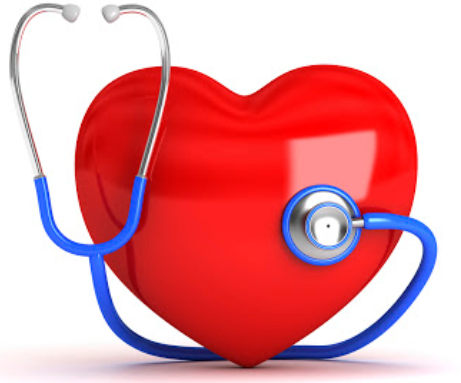



# Importing Libraries

In [31]:
#Data analysis and exploration libraries
import numpy as np
import pandas as pd

#Missing data handling library
from sklearn.impute import SimpleImputer

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Splitting data library
from sklearn.model_selection import train_test_split

#Feature scaling library
from sklearn.preprocessing import MinMaxScaler

#Model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Performance evaluation library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#library for graphical user interface
import tkinter
from tkinter import *

# Dataset Analysis

### Dataset Import

In [32]:
#Importing the dataset to dataframe

data_frame = pd.read_csv('Heart_disease_data.csv')

### Shape of Dataset

In [33]:
#Shape of dataset
print("Shape of the dataset is:",data_frame.shape)

Shape of the dataset is: (1190, 12)


### Dataset Headers

In [34]:
features=['age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak','ST slope','target']

for feature in range(len(features)):
    print("Column {0} in the dataset is {1}".format(feature+1, features[feature].title()))

Column 1 in the dataset is Age
Column 2 in the dataset is Sex
Column 3 in the dataset is Chest Pain Type
Column 4 in the dataset is Resting Bp S
Column 5 in the dataset is Cholesterol
Column 6 in the dataset is Fasting Blood Sugar
Column 7 in the dataset is Resting Ecg
Column 8 in the dataset is Max Heart Rate
Column 9 in the dataset is Exercise Angina
Column 10 in the dataset is Oldpeak
Column 11 in the dataset is St Slope
Column 12 in the dataset is Target


### Head of Dataset

In [35]:
#First five rows of the dataset

data_frame.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0,1,0
1,49,0,3,160,180,0,0,156,0,1,2,0
2,37,1,2,130,283,0,1,98,0,0,1,0
3,48,0,4,138,214,0,0,108,1,2,2,1
4,54,1,3,150,195,0,0,122,0,0,1,0


### Tail of Dataset

In [36]:
#Last five rows of the dataset

data_frame.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1,2,1
1186,68,1,4,144,193,1,0,141,0,3,2,1
1187,57,1,4,130,131,0,0,115,1,1,2,1
1188,57,0,2,130,236,0,2,174,0,0,2,1
1189,38,1,3,138,175,0,0,173,0,0,1,0


### Dataset Information

In [37]:
#initializing the lists
categorical_val = []
continous_val = []

#accessing each column header
for column in data_frame.columns:
    
    print('================================================================================')
    print(f"{column} : {data_frame[column].unique()}")
    
    if len(data_frame[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 28 62 30 29 74 68 72 64 69 67 73 70 77 75
 76 71]
sex : [1 0]
chest pain type : [2 3 4 1]
resting bp s : ['140' '160' '130' '138' '150' '120' '110' '136' '115' 'Nan' '100' '124'
 '113' '125' '145' '112' '132' '118' '190' '135' '180' '108' '170' '155'
 '128' '106' '94' '200' '122' '98' '105' '133' '95' '80' '137' '185' '165'
 '142' '126' '152' '116' '144' '154' '134' '104' '139' '131' '141' '178'
 '146' '158' '123' '102' '96' '143' '172' '156' '114' '127' '101' '174'
 '148' '117' '192' '129' '164']
cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272

# Data Cleaning and Preprocessing

### Missing row count

In [38]:
#initializing the variable
count=0

#checking for null rows
for i in data_frame.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)

Total number of rows with missing values is  0


### Header renaming

In [39]:
def preprocessing():
    
    global data_frame
    data_frame.columns=['age','sex','chest_pain','restbp','cholestrol','fbs','restecg','max_heart_rate',
                    'exercise_angine','oldpeak','ST_slope','target']
    data_frame=data_frame.replace('Nan', np.nan)
    plt.figure(figsize=(12, 6))
    plt.title("Missing values",size='20',weight='bold')
    sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='viridis');
    

### Missing value handling

In [40]:
def missing_data():
    
    global data_frame
    
    #function call
    preprocessing()
    
    #Simple imputer method for filling data       
    def restbp():
        imp = SimpleImputer(missing_values=np.nan,strategy="mean")
        imp = imp.fit(data_frame[['restbp']])
        data_frame['restbp'] = imp.transform(data_frame[['restbp']]).ravel()
    
    #function returing value to fill the missing data
    def impute_fbs(cols):
        age = cols[0]
        fbs = cols[1]
    
        if pd.isnull(fbs):
            if age <= 53 and age>=47:
                return 0
            elif age<40:
                return 1
            else:
                return 1

        else:
            return fbs
    
    #fillna method to impute missing data
    def restecg():
        data_frame['restecg']=data_frame['restecg'].fillna(value=0)
    
    #datatype conversion to integer
    def conversion():
        data_frame["restbp"] = data_frame["restbp"].astype(str).astype(float)
        data_frame["fbs"] = data_frame["fbs"].astype(str).astype(int)
        data_frame["restecg"] = data_frame["restecg"].astype(str).astype(int)
        
    
    #function call
    restbp()
    data_frame['fbs'] = data_frame[['age','fbs']].apply(impute_fbs,axis=1)
    restecg()
    conversion()


In [41]:
#visualizing the missing data
def visualize():
    missing_data()
    plt.figure(figsize=(12, 6))
    plt.title("No Missing values",size='20',weight='bold')
    sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='viridis');
    plt.show()

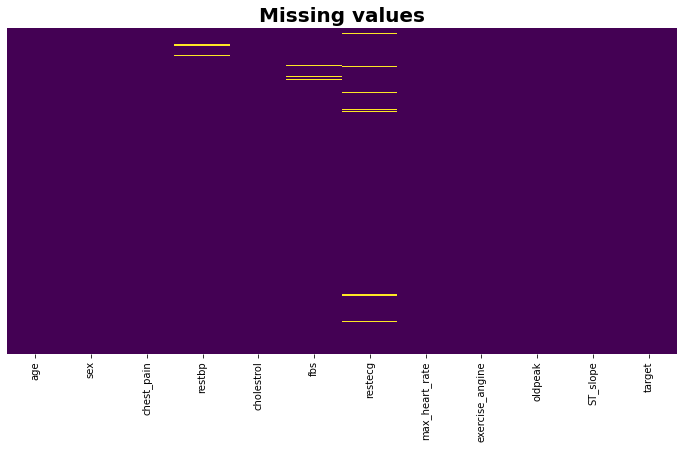

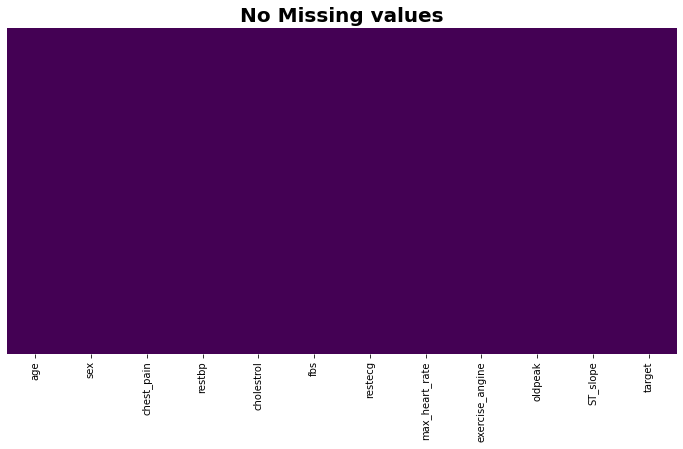

In [42]:
#function call
visualize()

# Statistical Data Analysis

### Statistical details of Dataset

In [14]:
#Statistical measures
data_frame.describe()

,age,sex,chest_pain,restbp,cholestrol,fbs,restecg,max_heart_rate,exercise_angine,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.719328,0.763866,3.232773,132.274894,241.281513,0.220168,0.694118,139.745378,0.387395,0.971429,1.626050,0.527731
std,9.360469,0.424884,0.935480,17.852875,54.990822,0.414534,0.869374,25.482226,0.487360,1.158226,0.608734,0.499440
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,211.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,231.000000,0.000000,0.000000,140.500000,0.000000,1.000000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,9.000000,3.000000,1.000000


# Data Visualization

### Correlation of Dataframe

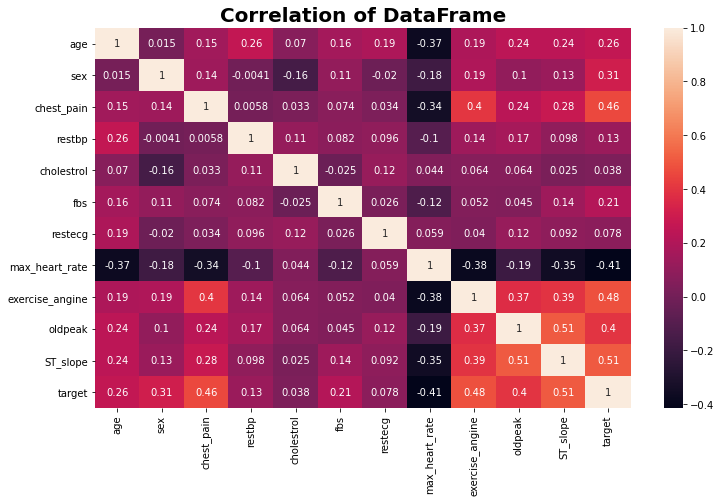

In [15]:
#Correlation
plt.figure(figsize=(12, 7))
plt.title("Correlation of DataFrame",size='20',weight='bold')
sns.heatmap(data_frame.corr(),annot=True);

### Categorical variables plot

In [16]:
#defining function
def bar_plot(variable):
    
    #get feature
    var = data_frame[variable]
    #count number of categorical variable (value/sample)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue,color = "powderblue", edgecolor = "black", linewidth = 2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    

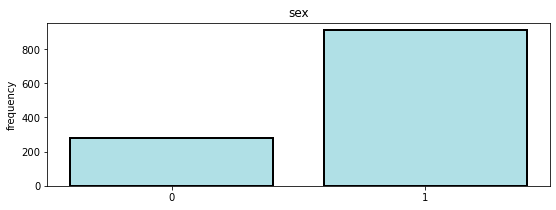

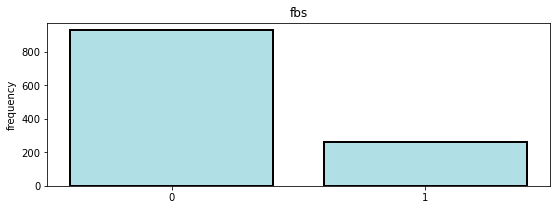

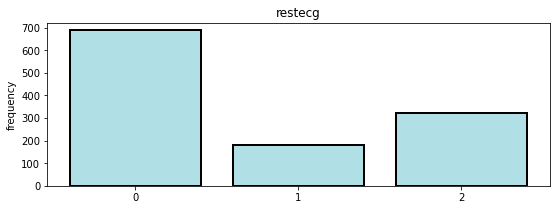

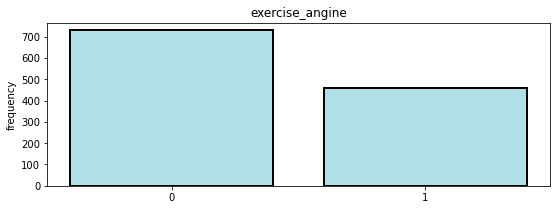

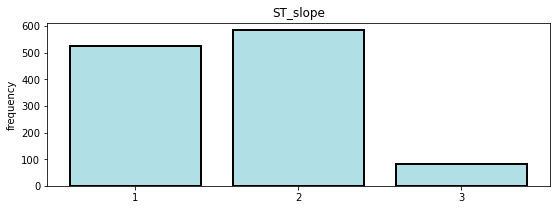

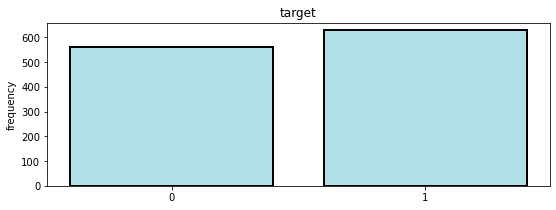

In [17]:
#function call
category = ["sex","fbs","restecg","exercise_angine","ST_slope","target"]
for c in category:
    bar_plot(c)

### Numeric variables plot

In [18]:
#defining the function
def plot_hist(variable):
    print("min {} : {} ".format(variable, min(data_frame[variable])))
    print("max {} : {}".format(variable, max(data_frame[variable])))
    
    plt.figure(figsize=(9,3))
    plt.hist(data_frame[variable], color="salmon")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

min age : 28 
max age : 77


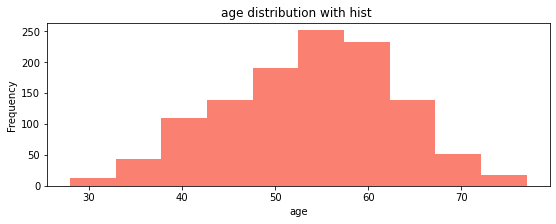

min max_heart_rate : 60 
max max_heart_rate : 202


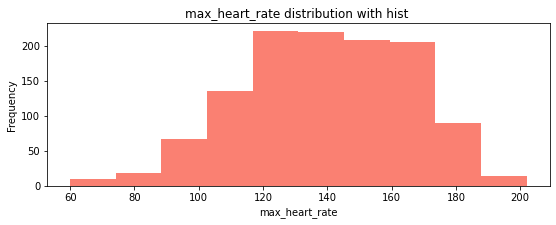

min cholestrol : 85 
max cholestrol : 603


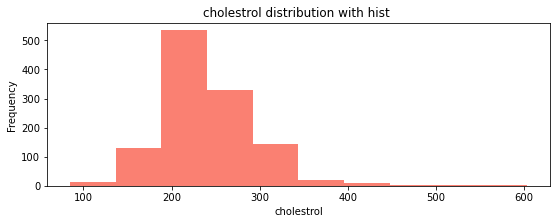

min restbp : 80.0 
max restbp : 200.0


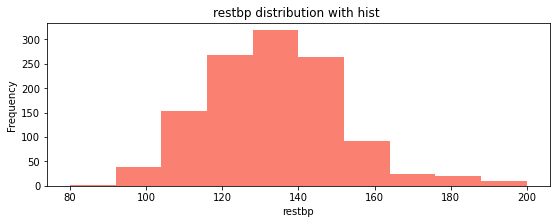

In [19]:
#function call
numericVar = ["age","max_heart_rate","cholestrol",'restbp']
for n in numericVar:
    plot_hist(n)

### Distribution Graphs

In [20]:
#defining the function
def distribution():
    
    #Pairplot
    sns.pairplot(data_frame, hue = 'target', vars = ['age', 'restbp', 'cholestrol'],palette='BuPu_r');
    plt.show()
    
    #Distribution graph of Age and Gender of Heart Disease and Normal patients
    attr_1=data_frame[data_frame['target']==1]
    attr_0=data_frame[data_frame['target']==0]

    fig = plt.figure(figsize=(11,4))
    ax1 = plt.subplot2grid((1,2),(0,0))
    sns.distplot(attr_0['age'],color='lightcoral');
    plt.title('Age Distribution of Normal People', fontsize=15, weight='bold')

    ax1 = plt.subplot2grid((1,2),(0,1))
    sns.countplot(attr_0['sex'], palette='icefire');
    plt.title('Gender Distribution of Normal People', fontsize=15, weight='bold' )
    plt.show()

    fig = plt.figure(figsize=(11,4))
    ax1 = plt.subplot2grid((1,2),(0,0))
    sns.distplot(attr_1['age'],color='coral');
    plt.title('Age Distribution of Patients', fontsize=15, weight='bold')

    ax1 = plt.subplot2grid((1,2),(0,1))
    sns.countplot(attr_1['sex'], palette='icefire');
    plt.title('Gender Distribution of Patients', fontsize=15, weight='bold' )
    plt.show()

    #Heart Disease Frequency for Male and Female Ages

    pd.crosstab(data_frame.age,data_frame.target).plot(kind="bar",figsize=(12,7),color=['powderblue','Salmon'])
    plt.title('Heart Disease Frequency for Male and Female Ages',weight='bold',size='20')
    plt.xlabel('Age',size='20')
    plt.ylabel('Frequency',size='20')
    plt.show()

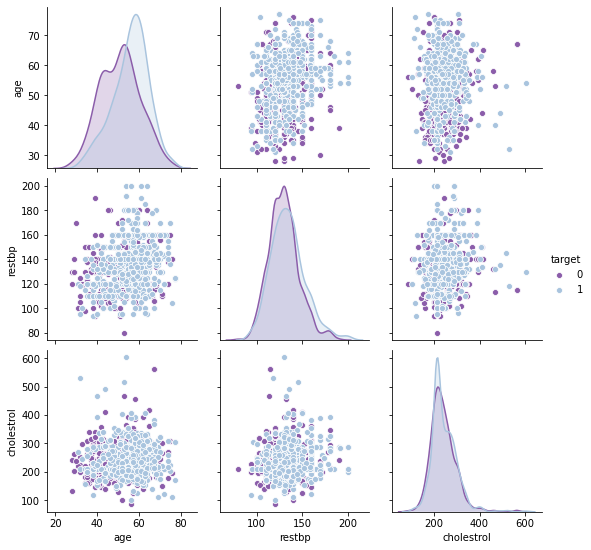

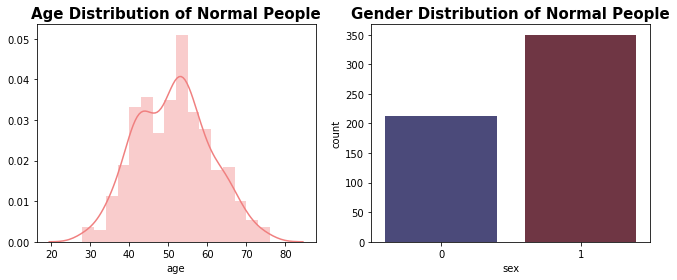

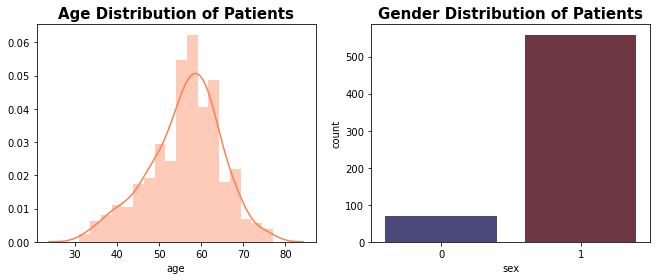

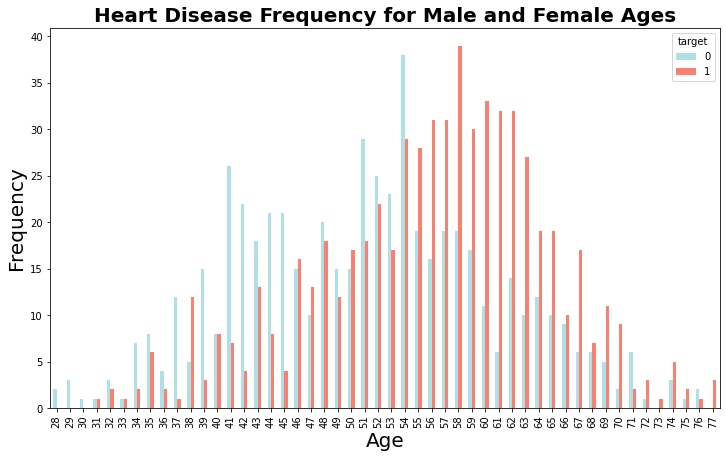

In [21]:
#function call
distribution()

### Feature relations

In [22]:
#defining function
def relation():

    # linear regression within each dataset
    sns.lmplot(x="restbp", y="cholestrol",data=data_frame,hue="chest_pain",palette='rocket_r',height=7)
    plt.title("Relation with Rest BP and Cholestrol",size='20',weight='bold')
    plt.show()

    #Cholesterol vs Maximum Heart Rate
    plt.rcParams['figure.figsize'] = (12,7)
    sns.scatterplot(x='cholestrol', y='max_heart_rate', hue='sex', size=None, data=data_frame,palette='BuPu_r')
    plt.title('Cholesterol vs Max Heart Rate',size='20',weight='bold');
    plt.ylabel('Maximum Heart Rate',size='20');
    plt.xlabel('Cholestrol',size='20');
    
    plt.figure(figsize=(12,7))
    sns.stripplot(data=data_frame,x='exercise_angine',y='oldpeak',hue='target',palette='BuPu_r')
    plt.title("Exercise Angina and Old Peak",weight='bold',size='20')
    plt.xlabel("Excercise Angina",size='20')
    plt.ylabel("Oldpeak",size='20')
    plt.show()

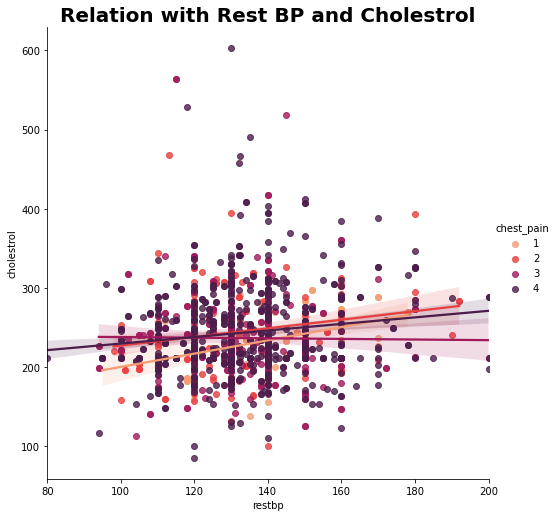

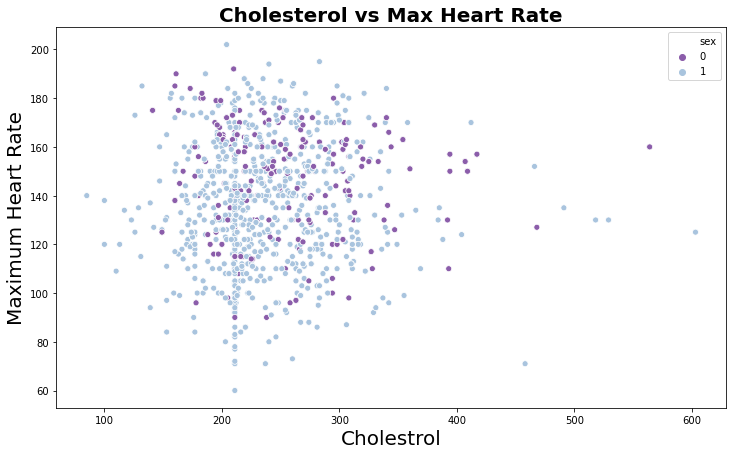

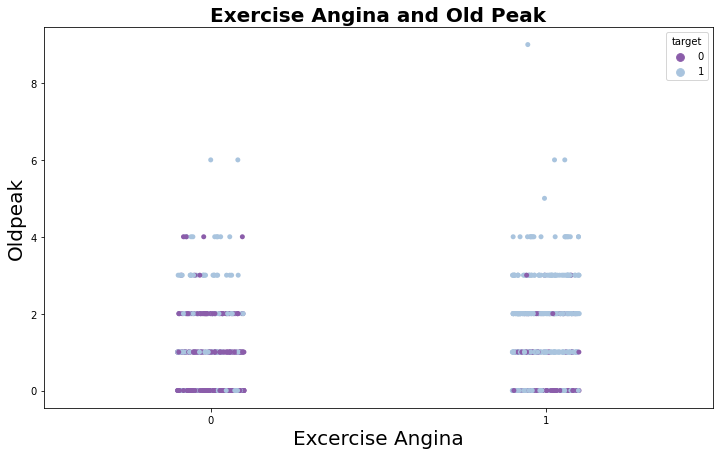

In [23]:
#function call
relation()

# Model Building

### Feature Encoding, Scaling and Data splitting

In [43]:
#copying the dataframe to new dataframe
data_frame1=data_frame.copy(deep=True)

In [44]:
#defining class
class model():
    
    #definfing function
    def encoding(self):
        global data_frame
        
        #feature encoding
        chest_pain = pd.get_dummies(data_frame['chest_pain'],drop_first=True)
        restecg = pd.get_dummies(data_frame['restecg'],drop_first=True)
        slope = pd.get_dummies(data_frame['ST_slope'],drop_first=True)
        
        #column renaming
        chest_pain.columns=['atypical','non-anginal','asymptomatic']
        restecg.columns=['restecg1','restecg2']
        slope.columns=['upslope','flatslope']
        
        #concatinating the columsn to dataframe
        data_frame = pd.concat([data_frame,chest_pain,restecg,slope],axis=1)
        data_frame.drop(['chest_pain','restecg','ST_slope'],axis=1,inplace=True)
        
        #changing the column position
        data_frame=data_frame[['age','restbp','cholestrol','max_heart_rate','oldpeak',
               'sex','fbs','exercise_angine','atypical','non-anginal','asymptomatic','restecg1','restecg2',
               'upslope','flatslope','target']]
    
    #defining function
    def scaling(self):
        
        global data_frame
        
        #feature scaling
        min_max = MinMaxScaler()
        columns_to_scale = ['age', 'restbp', 'cholestrol', 'max_heart_rate', 'oldpeak']
        data_frame[columns_to_scale ] = min_max.fit_transform(data_frame[columns_to_scale])
        
    #defining function        
    def splitting(self):
        global data_frame
        global X_train
        global X_test
        global y_train
        global y_test
        
        #data splitting
        X = data_frame.iloc[:, :-1].values
        y = data_frame.iloc[:, -1].values

        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
        
  

In [45]:
#object creation and method call

obj=model()

obj.encoding()
obj.scaling()
obj.splitting()

## Classification Model

### Function to print the model accuracy

In [46]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [47]:
#defining function
def model_prediction():
    
    #Training data using Logistic Regression Algorithm
    print("Logistic Regression Model\n")
    print("******************************************")
    lr_clf = LogisticRegression(solver='liblinear')
    lr_clf.fit(X_train, y_train)
    print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
    print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)
    
    #Training data using K-nearest neighbors Algorithm
    print("K-nearest neighbors\n")
    print("*****************************************")
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(X_train, y_train)
    print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
    print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)
    
    #Training data using Support Vector Machine Algorithm
    print("Support Vector Machine\n")
    print("*****************************************")
    svm_clf = SVC(C = 10, gamma = 1, kernel ='rbf')
    svm_clf.fit(X_train, y_train)
    print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
    print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

In [48]:
#function call
model_prediction()

Logistic Regression Model

******************************************
Train Result:
Accuracy Score: 84.45%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.845103    0.844055  0.844538    0.844579      0.844551
recall       0.822616    0.864271  0.844538    0.843444      0.844538
f1-score     0.833708    0.854043  0.844538    0.843876      0.844410
support    451.000000  501.000000  0.844538  952.000000    952.000000
_______________________________________________
Confusion Matrix: 
 [[371  80]
 [ 68 433]]

Test Result:
Accuracy Score: 86.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.848214    0.873016  0.861345    0.860615      0.861449
recall       0.855856    0.866142  0.861345    0.860999      0.861345
f1-score     0.852018    0.869565  0.861345    0.860792      0.

## Proposed Model

SVM classification model is proposed for Heart Disease prediction which provides an accuracy of 90%.

## GUI Based Heart Disease Prediction using SVM Model- accuracy 90%

In [49]:
#defining function
def takeInput():
    
    global data_frame1
    global final_Result
    inputValues = []
    
    global age
    global bps
    global chol
    global mhr
    global st

    #feature scaling           
    age = ((int(age.get()) - 28)  / (77-28))
    bps = ((int(bps.get()) - 80)/(200-80))
    chol = ((int (chol.get()) - 85)/(603-85))
    mhr = ((int(mhr.get()) - 60)/(202-60))
    st = ((int(st.get())-1) / (3-1))            
    
    #getting input values
    inputValues.append(age)
    inputValues.append(sex.get())
    inputValues.append(cp.get())
    inputValues.append(bps)
    inputValues.append(chol)
    inputValues.append(fbs.get())
    inputValues.append(ecg.get())
    inputValues.append(mhr)
    inputValues.append(eia.get())
    inputValues.append(st)
    inputValues.append(slope.get())
    
    #predicting output
    final_Result = classifier.predict([inputValues])
   
    #defining result prediction window details
    substituteWindow = tkinter.Tk()
    substituteWindow.geometry('640x480')
    substituteWindow.title("RESULT PREDICTION")
    substituteWindow.configure(bg="lavender")
    
    substituteWindow.columnconfigure(0, weight=2)
    substituteWindow.columnconfigure(1, weight=1)
    substituteWindow.columnconfigure(2, weight=2)
    substituteWindow.columnconfigure(3, weight=2)
    substituteWindow.rowconfigure(0, weight=1)
    substituteWindow.rowconfigure(1, weight=10)
    substituteWindow.rowconfigure(2, weight=10)
    substituteWindow.rowconfigure(3, weight=1)
    substituteWindow.rowconfigure(4, weight=1)
    substituteWindow.rowconfigure(5, weight=1)

    #checking the condition
    if final_Result[0] == 1:
        label1 = tkinter.Label(substituteWindow, text="HEART DISEASE DETECTED", font=('Times',20), fg='PaleVioletRed1')
        label1.grid(row=0, column=1, columnspan=6)
        label2 = tkinter.Label(substituteWindow, text="PLEASE VISIT NEAREST CARDIOLOGIST AT THE EARLIEST", font=('Times', 15), fg='coral1')
        label2.grid(row=1, column=1, columnspan=6)
        label3 = tkinter.Label(substituteWindow, text = "KIMS Hospital, Contact number-0471-223769", font=('Times', 15))
        label3.grid(row=3, column = 2)
        label4 = tkinter.Label(substituteWindow, text = "Ananthapuri Hospital, Contact number-0471-725257", font=('Times', 15))
        label4.grid(row=4, column = 2)
        label4 = tkinter.Label(substituteWindow, text = "TSC Hospital,Contact number-0471-376526", font=('Times', 15))
        label4.grid(row=5, column = 2)
    else: 
        label1 = tkinter.Label(substituteWindow, text="NO DETECTION OF HEART DISEASES", font=('Times', 25),fg='PaleVioletRed1' )
        label1.grid(row=1, column=1, columnspan=6)
        label2 = tkinter.Label(substituteWindow, text="Do not forget to exercise daily. ", font=('Times', 20), fg='coral1')
        label2.grid(row=3, column=1, columnspan=6)      
        
    substituteWindow.mainloop()
        

#feature scaling 
min_max = MinMaxScaler()
columns_to_scale = ['age', 'restbp', 'cholestrol', 'max_heart_rate', 'oldpeak']
data_frame1[columns_to_scale ] = min_max.fit_transform(data_frame1[columns_to_scale])
y = data_frame1['target']
X = data_frame1.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#feature encoding
data_frame1 = pd.get_dummies(data_frame1, columns = ['sex', 'chest_pain', 'fbs', 'restecg', 'exercise_angine', 'ST_slope'])

#model training
classifier = SVC(C = 10, gamma = 1, kernel = 'rbf')
classifier.fit(X_train, y_train)    

#main window configurations    
mainWindow = Tk()
mainWindow.geometry('600x450')
mainWindow['padx']=20
mainWindow.title("HEART DISEASE PREDICTION")
mainWindow.configure(bg="lavender")

label1 = tkinter.Label(mainWindow, text="HEART DISEASE PREDICTION MODEL", font=('Times',20), bg='lavender')
label1.grid(row=0, column=0, columnspan=6)

#label configurations
lbl = Label(mainWindow, text=" AGE",font=("Times", 12))
lbl.grid(column=1, row=1)
age = Entry(mainWindow,width=20)
age.grid(column=3, row=1,pady=5)
age.focus()


lbl = Label(mainWindow, text=" SEX (1=MALE;0=FEMALE",font=("Times", 12))
lbl.grid(column=1, row=2)
sex = Entry(mainWindow,width=20)
sex.grid(column=3, row=2,pady=5)
sex.focus()

lbl = Label(mainWindow, text="CHEST PAIN LEVEL-1/2/3/4",font=("Times", 12))
lbl.grid(column=1, row=3)
cp = Entry(mainWindow,width=20)
cp.grid(column=3, row=3,pady=5)
cp.focus()

lbl = Label(mainWindow, text="RESTING BLOOD PRESSURE(in mm/Hg )",font=("Times", 12))
lbl.grid(column=1, row=4)
bps = Entry(mainWindow,width=20)
bps.grid(column=3, row=4,pady=5)
bps.focus()

lbl = Label(mainWindow, text="CHOLESTROL(in mg/dl)",font=("Times", 12))
lbl.grid(column=1, row=5)
chol = Entry(mainWindow,width=20)
chol.grid(column=3, row=5,pady=5)
chol.focus()

lbl = Label(mainWindow, text="(FASTING BLOOD SUGAR > 120 mg/dl) (1 = TRUE; 0 = FALSE)",font=("Times", 12))
lbl.grid(column=1, row=6)
fbs = Entry(mainWindow,width=20)
fbs.grid(column=3, row=6,pady=5)
fbs.focus()

lbl = Label(mainWindow, text="RESTING ELECTROCARDIOGRAPHIC RESULTS",font=("Times", 12))
lbl.grid(column=1, row=7)
ecg = Entry(mainWindow,width=20)
ecg.grid(column=3, row=7,pady=5)
ecg.focus()

lbl = Label(mainWindow, text="MAXIMUM HEART RATE ACHIEVED",font=("Times", 12))
lbl.grid(column=1, row=8)
mhr = Entry(mainWindow,width=20)
mhr.grid(column=3, row=8,pady=5)
mhr.focus()

lbl = Label(mainWindow, text="EXCERCISE INDUCED ANGINA (1 = YES; 0 = NO)",font=("Times", 12))
lbl.grid(column=1, row=9)
eia = Entry(mainWindow,width=20)
eia.grid(column=3, row=9,pady=5)
eia.focus()

lbl = Label(mainWindow, text="ST DEPRESSION INDUCED BY EXCERCISE RELATIVE TO REST",font=("Times", 12))
lbl.grid(column=1, row=10)
st = Entry(mainWindow,width=20)
st.grid(column=3, row=10,pady=5)
st.focus()

lbl = Label(mainWindow, text="SLOPE OF ST SEGMENT",font=("Times", 12))
lbl.grid(column=1, row=11)
slope = Entry(mainWindow,width=20)
slope.grid(column=3, row=11,pady=5)
slope.focus()

#function call
analyseButton = tkinter.Button(mainWindow, text="PREDICT HEART DISEASE", font=("Times", 15), bg = 'PaleVioletRed1', command=takeInput)
analyseButton.grid(row=15, column=0, columnspan=20,pady=5)

mainWindow.mainloop()
